In [7]:
from pathlib import Path
import json

geojsonfile = Path("uk_boundaries_2024.geojson")

def round_floats(obj, decimal_places=6):
    if isinstance(obj, float):
        return round(obj, decimal_places)
    elif isinstance(obj, dict):
        return {k: round_floats(v, decimal_places) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [round_floats(elem, decimal_places) for elem in obj]
    else:
        return obj

# Load your JSON file
with geojsonfile.open("r") as f:
    data = json.load(f)

# Round the floats
rounded_data = round_floats(data, 6)  # Change 8 to 6 if you prefer

# Save the updated JSON back to a file
with open('uk_boundaries_2024_small.geojson', 'w') as f:
    json.dump(rounded_data, f, indent=None, separators=(",",":"))

<GeoAxes: >

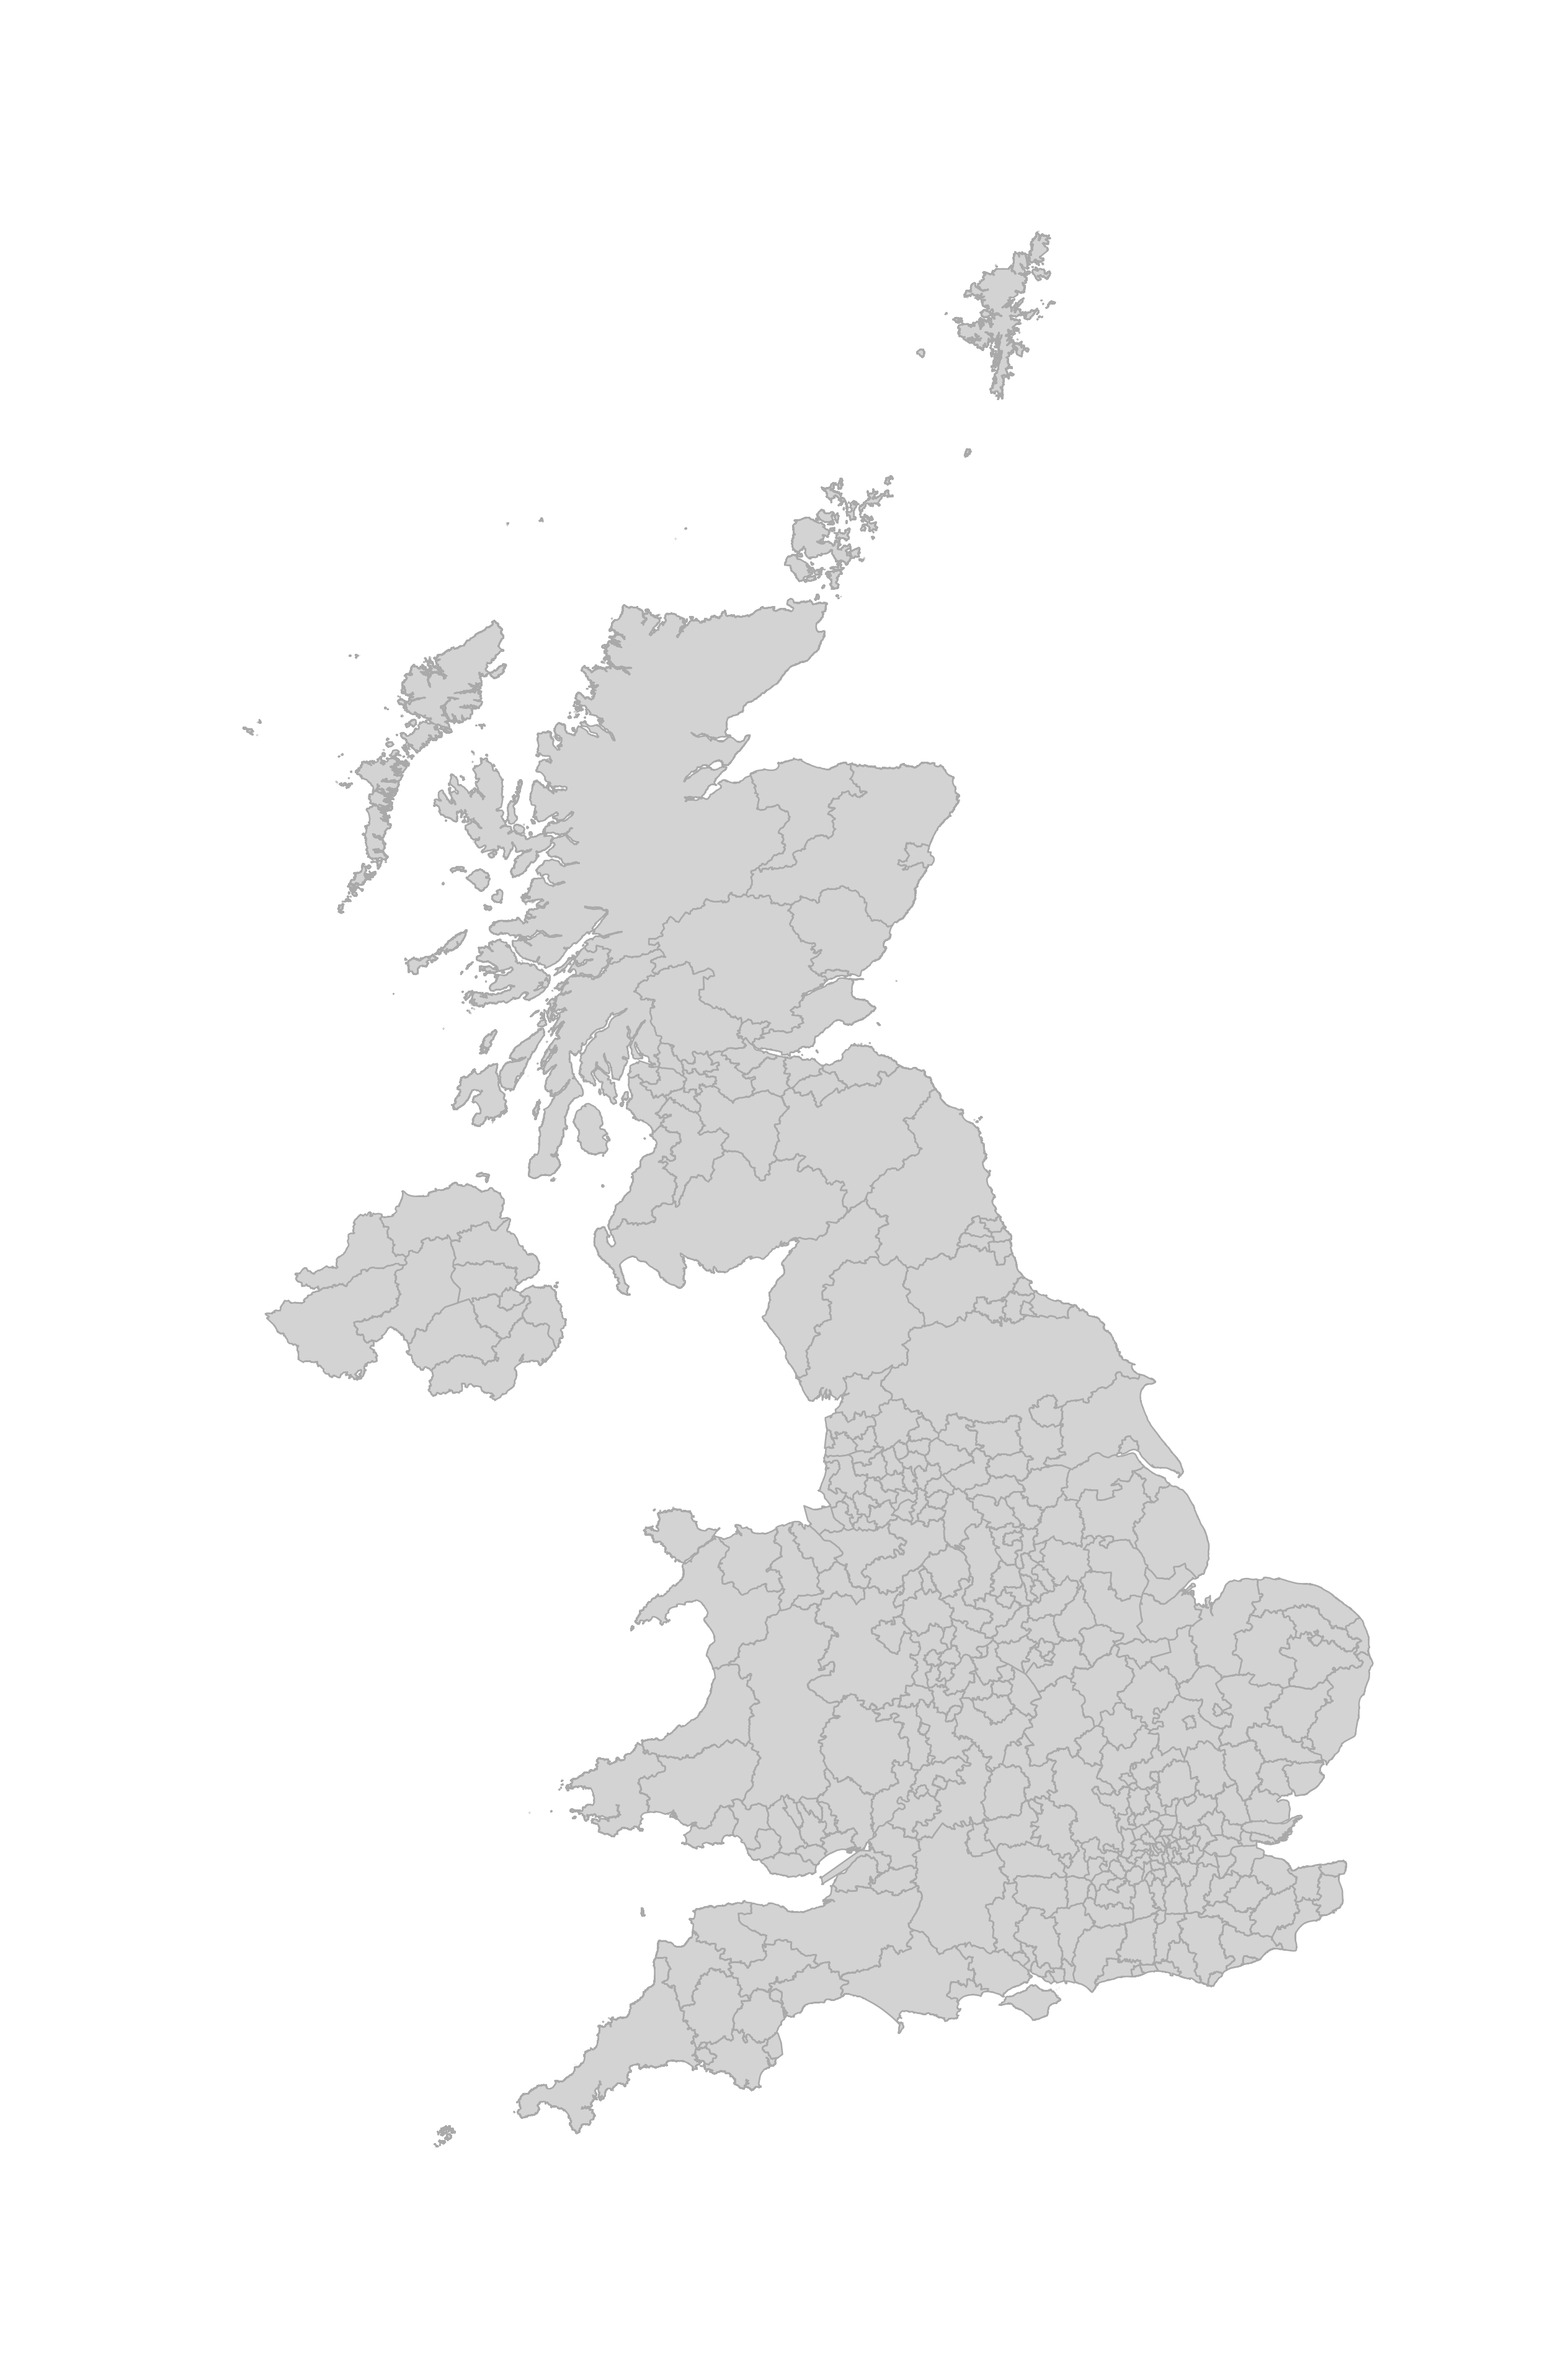

In [6]:
from pathlib import Path
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib

matplotlib.rcParams["figure.dpi"] = 600

geojsonfile = Path("uk_boundaries_2024_small.geojson")
gdf = gpd.read_file(geojsonfile)

geoplot.polyplot(
    df = gdf,
    projection = gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)